In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy.stats import kstest, norm
from scipy.stats import chi2_contingency

df = pd.read_csv('data.csv')
pd.set_option('display.max_columns', None)
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [5]:
# Calcular el porcentaje de valores nulos en la columna 'Price'
total_rows = df.shape[0]
null_price_rows = df['Price'].isnull().sum()
null_percentage = (null_price_rows / total_rows) * 100

print(f"Porcentaje de filas con valores nulos en la columna 'Price': {null_percentage:.2f}%")

# Eliminar valores nulos de la columna 'Price'
df_cleaned = df.dropna(subset=['Price']).copy()

# Convertir la columna 'Price' a entero usando .loc para evitar el SettingWithCopyWarning
df_cleaned.loc[:, 'Price'] = df_cleaned['Price'].astype(int)

# Mostrar el tamaño del DataFrame original y el tamaño del DataFrame limpio
print(f"Filas originales: {total_rows}")
print(f"Filas después de eliminar nulos en 'Price': {df_cleaned.shape[0]}")


Porcentaje de filas con valores nulos en la columna 'Price': 21.83%
Filas originales: 34857
Filas después de eliminar nulos en 'Price': 27247


In [6]:
# Contar la cantidad de cada tipo de propiedad
property_type_counts = df['Type'].value_counts()

# Encontrar el tipo más común y el porcentaje que representa
most_common_type = property_type_counts.idxmax()  # Tipo más común
most_common_count = property_type_counts.max()    # Número de propiedades de ese tipo
percentage_most_common = (most_common_count / df.shape[0]) * 100  # Porcentaje

print(f"El tipo más común de propiedad es: {most_common_type}")
print(f"Porcentaje que representa: {percentage_most_common:.2f}%")


El tipo más común de propiedad es: h
Porcentaje que representa: 68.80%


Text(0, 0.5, 'Frecuencia')

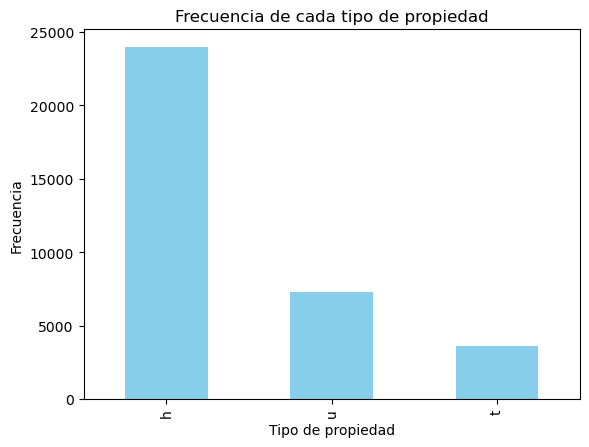

In [9]:
# Contar la frecuencia de cada tipo de propiedad
property_type_counts = df['Type'].value_counts()

# Crear un gráfico de barras
property_type_counts.plot(kind='bar', color='skyblue')

# Añadir etiquetas y título
plt.title('Frecuencia de cada tipo de propiedad')
plt.xlabel('Tipo de propiedad')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Precio mediano de la propiedad')

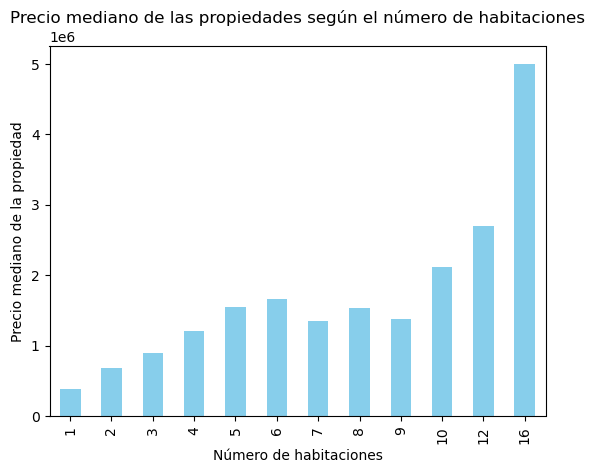

In [10]:
# Asegurarse de que no haya valores nulos en las columnas de Rooms y Price
df_cleaned = df.dropna(subset=['Rooms', 'Price'])

# Agrupar por número de habitaciones y calcular el precio mediano
median_price_by_rooms = df_cleaned.groupby('Rooms')['Price'].median()

# Crear un gráfico de barras para mostrar el precio mediano por número de habitaciones
median_price_by_rooms.plot(kind='bar', color='skyblue')

# Añadir etiquetas y título
plt.title('Precio mediano de las propiedades según el número de habitaciones')
plt.xlabel('Número de habitaciones')
plt.ylabel('Precio mediano de la propiedad')

In [14]:
# Asegurarse de que no haya valores nulos en las columnas de Rooms y Price
df_cleaned = df.dropna(subset=['Rooms', 'Price'])

# Calcular el coeficiente de correlación de Spearman
corr, p_value = spearmanr(df_cleaned['Rooms'], df_cleaned['Price'])

# Mostrar el coeficiente de correlación y el p-valor
print(f"Coeficiente de correlación de Spearman: {corr:.2f}")
print(f"P-valor: {p_value:.2e}")

Coeficiente de correlación de Spearman: 0.50
P-valor: 0.00e+00


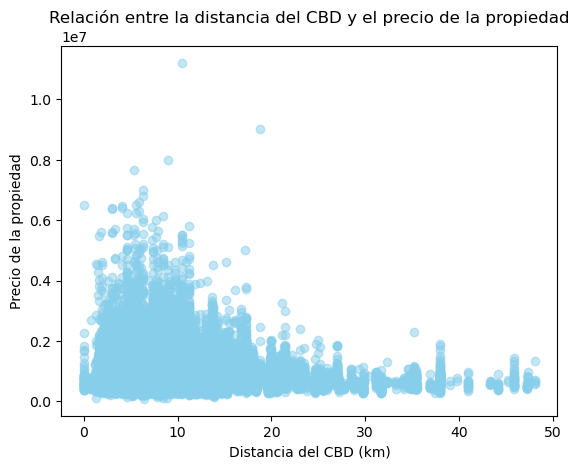

Coeficiente de correlación de Pearson: -0.21
P-valor: 8.44e-273


In [16]:
# Asegurarse de que no haya valores nulos en las columnas de Distance y Price
df_cleaned = df.dropna(subset=['Distance', 'Price'])

# Crear un gráfico de dispersión (scatter plot) para visualizar la relación
plt.scatter(df_cleaned['Distance'], df_cleaned['Price'], alpha=0.5, color='skyblue')
plt.title('Relación entre la distancia del CBD y el precio de la propiedad')
plt.xlabel('Distancia del CBD (km)')
plt.ylabel('Precio de la propiedad')

# Calcular el coeficiente de correlación de Pearson
corr, p_value = pearsonr(df_cleaned['Distance'], df_cleaned['Price'])

# Mostrar el coeficiente de correlación y el p-valor
print(f"Coeficiente de correlación de Pearson: {corr:.2f}")
print(f"P-valor: {p_value:.2e}")

Coeficiente de correlación de Pearson: 0.03
P-valor: 1.12e-05


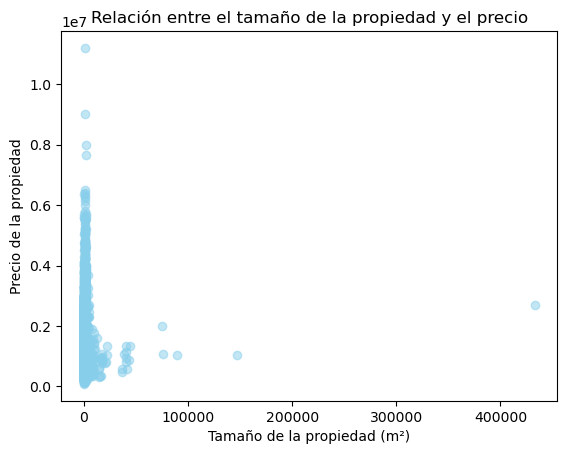

In [17]:
# Asegurarse de que no haya valores nulos en las columnas de Landsize y Price
df_cleaned = df.dropna(subset=['Landsize', 'Price'])

# Crear un gráfico de dispersión (scatter plot) para visualizar la relación entre el tamaño de la propiedad y el precio
plt.scatter(df_cleaned['Landsize'], df_cleaned['Price'], alpha=0.5, color='skyblue')
plt.title('Relación entre el tamaño de la propiedad y el precio')
plt.xlabel('Tamaño de la propiedad (m²)')
plt.ylabel('Precio de la propiedad')

# Calcular el coeficiente de correlación de Pearson
corr, p_value = pearsonr(df_cleaned['Landsize'], df_cleaned['Price'])

# Mostrar el coeficiente de correlación y el p-valor
print(f"Coeficiente de correlación de Pearson: {corr:.2f}")
print(f"P-valor: {p_value:.2e}")

Text(0, 0.5, 'Precio mediano de la propiedad')

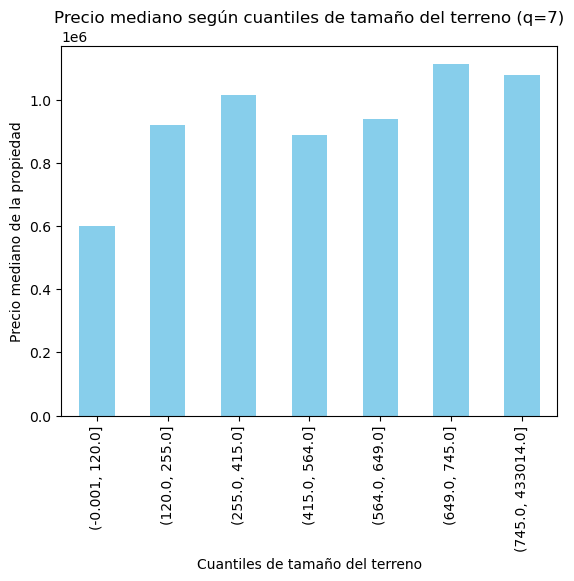

In [19]:
# Asegurarse de que no haya valores nulos en las columnas de Landsize y Price
df_cleaned = df.dropna(subset=['Landsize', 'Price']).copy()

# Crear los grupos basados en los cuantiles (q=7) usando qcut
df_cleaned.loc[:, 'Landsize_quantiles'] = pd.qcut(df_cleaned['Landsize'], q=7)

# Calcular el precio mediano por cada grupo de tamaño de terreno, asegurando que 'observed=True'
median_price_by_landsize = df_cleaned.groupby('Landsize_quantiles', observed=True)['Price'].median()

# Crear un gráfico de barras para mostrar el precio mediano en cada grupo de cuantiles de tamaño de terreno
median_price_by_landsize.plot(kind='bar', color='skyblue')

# Añadir etiquetas y título
plt.title('Precio mediano según cuantiles de tamaño del terreno (q=7)')
plt.xlabel('Cuantiles de tamaño del terreno')
plt.ylabel('Precio mediano de la propiedad')

Porcentaje de propiedades identificadas como outliers: 4.69%


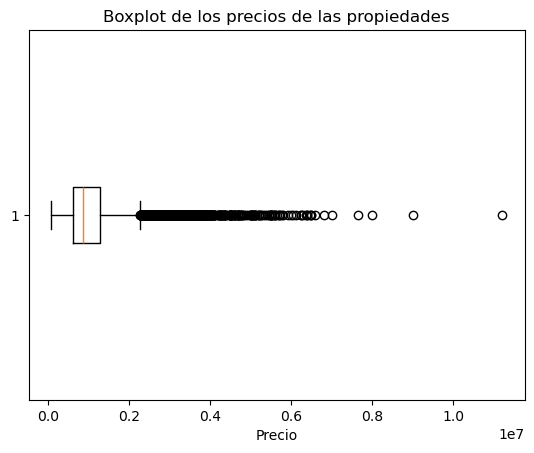

In [20]:
# Asegurarse de que no haya valores nulos en la columna Price
df_cleaned = df.dropna(subset=['Price'])

# Calcular el IQR (Rango Intercuartil)
Q1 = df_cleaned['Price'].quantile(0.25)
Q3 = df_cleaned['Price'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para detectar los outliers usando el método de Tukey (1.5 * IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = df_cleaned[(df_cleaned['Price'] < lower_bound) | (df_cleaned['Price'] > upper_bound)]

# Calcular el porcentaje de outliers
outlier_percentage = (outliers.shape[0] / df_cleaned.shape[0]) * 100

# Crear un boxplot para visualizar los outliers
plt.boxplot(df_cleaned['Price'], vert=False)
plt.title('Boxplot de los precios de las propiedades')
plt.xlabel('Precio')

# Mostrar el porcentaje de outliers
print(f"Porcentaje de propiedades identificadas como outliers: {outlier_percentage:.2f}%")

Asimetría (Skewness): 2.59
Curtosis: 13.10


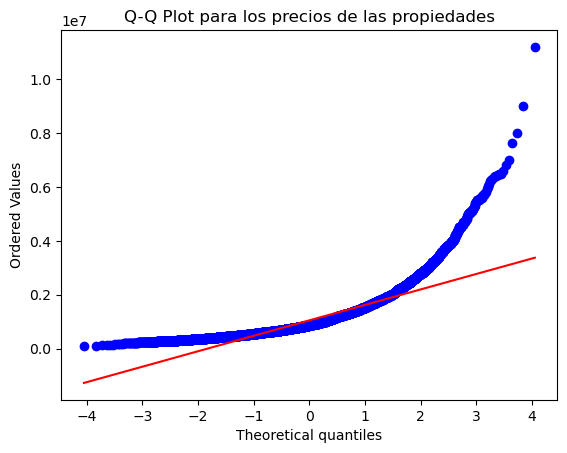

In [23]:
# Asegurarse de que no haya valores nulos en la columna Price
df_cleaned = df.dropna(subset=['Price'])

# Crear un Q-Q plot para los precios de las propiedades
stats.probplot(df_cleaned['Price'], dist="norm", plot=plt)
plt.title('Q-Q Plot para los precios de las propiedades')

# Calcular la skewness (asimetría) y la kurtosis (curtosis)
skewness = df_cleaned['Price'].skew()
kurtosis = df_cleaned['Price'].kurtosis()

# Mostrar skewness y kurtosis
print(f"Asimetría (Skewness): {skewness:.2f}")
print(f"Curtosis: {kurtosis:.2f}")

In [25]:
# Asegurarse de que no haya valores nulos en la columna Price
df_cleaned = df.dropna(subset=['Price'])

# Realizar la prueba de Kolmogorov-Smirnov para comparar con una distribución normal
ks_stat, p_value = kstest(df_cleaned['Price'], 'norm', args=(df_cleaned['Price'].mean(), df_cleaned['Price'].std()))

# Mostrar los resultados de la prueba
print(f'Estadístico de Kolmogorov-Smirnov: {ks_stat:.4f}')
print(f'P-valor: {p_value:.4e}')

# Interpretación de resultados
if p_value < 0.05:
    print("Los resultados indican que la distribución de los precios es significativamente diferente de una distribución normal.")
else:
    print("Los resultados indican que la distribución de los precios no es significativamente diferente de una distribución normal.")

Estadístico de Kolmogorov-Smirnov: 0.1375
P-valor: 0.0000e+00
Los resultados indican que la distribución de los precios es significativamente diferente de una distribución normal.


Text(0, 0.5, 'Precio de la propiedad')

<Figure size 800x600 with 0 Axes>

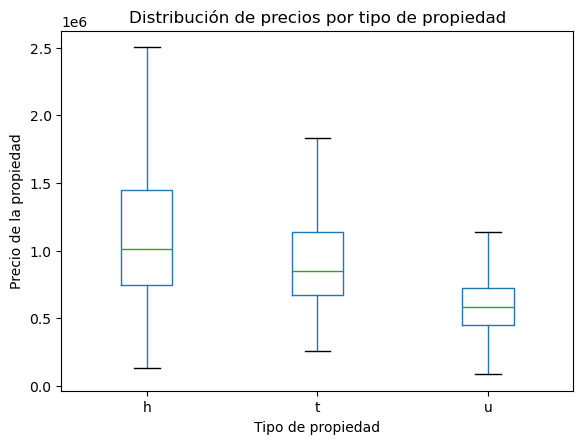

In [26]:
# Asegurarse de que no haya valores nulos en las columnas de Price y Type
df_cleaned = df.dropna(subset=['Price', 'Type'])

# Crear un box plot para mostrar la distribución de los precios según el tipo de propiedad
plt.figure(figsize=(8,6))
df_cleaned.boxplot(column='Price', by='Type', grid=False, showfliers=False)

# Añadir etiquetas y título
plt.title('Distribución de precios por tipo de propiedad')
plt.suptitle('')  # Eliminar el título por defecto de pandas
plt.xlabel('Tipo de propiedad')
plt.ylabel('Precio de la propiedad')

In [27]:
# Asegurarse de que no haya valores nulos en las columnas de Price y Regionname
df_cleaned = df.dropna(subset=['Price', 'Regionname'])

# Calcular el precio mediano por región
median_price_by_region = df_cleaned.groupby('Regionname')['Price'].median()

# Encontrar la región con el precio mediano más alto y más bajo
most_expensive_region = median_price_by_region.idxmax()
highest_median_price = median_price_by_region.max()

cheapest_region = median_price_by_region.idxmin()
lowest_median_price = median_price_by_region.min()

# Mostrar los resultados
print(f"La región más cara es: {most_expensive_region} con un precio mediano de {highest_median_price}")
print(f"La región más barata es: {cheapest_region} con un precio mediano de {lowest_median_price}")

La región más cara es: Southern Metropolitan con un precio mediano de 1250000.0
La región más barata es: Western Victoria con un precio mediano de 412125.0


In [31]:
# Asegurarse de que no haya valores nulos en las columnas de Price y Regionname
df_cleaned = df.dropna(subset=['Price', 'Regionname'])

# Crear 5 rangos para la variable 'Price'
df_cleaned['Price_Range'] = pd.qcut(df_cleaned['Price'], q=5, labels=False)

# Crear una tabla de contingencia entre Regionname y Price_Range
contingency_table = pd.crosstab(df_cleaned['Regionname'], df_cleaned['Price_Range'])

# Realizar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calcular el coeficiente de Cramér's V
n = contingency_table.sum().sum()  # Total de observaciones
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Mostrar los resultados
print(f"Valor de Chi-cuadrado: {chi2}")
print(f"P-valor: {p}")
print(f"Grados de libertad: {dof}")
print(f"Coeficiente de Cramér's V: {cramers_v:.2f}")

# Interpretación según Cohen (1988)
if cramers_v < 0.1:
    print("Relación débil")
elif cramers_v < 0.3:
    print("Relación moderada")
elif cramers_v < 0.5:
    print("Relación fuerte")
else:
    print("Relación muy fuerte")

Valor de Chi-cuadrado: 5729.753153907544
P-valor: 0.0
Grados de libertad: 28
Coeficiente de Cramér's V: 0.23
Relación moderada


C:\Users\usr\AppData\Local\Temp\ipykernel_21916\3575755844.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Price_Range'] = pd.qcut(df_cleaned['Price'], q=5, labels=False)


In [32]:
# Asegurarse de que no haya valores nulos en las columnas de Date y Price
df_cleaned = df.dropna(subset=['Date', 'Price'])

# Convertir la columna 'Date' a tipo datetime
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], format='%d/%m/%Y')

# Extraer el año de la columna 'Date'
df_cleaned['Year'] = df_cleaned['Date'].dt.year

# Encontrar el año más antiguo y el más reciente
earliest_year = df_cleaned['Year'].min()
latest_year = df_cleaned['Year'].max()

# Calcular el precio mediano para el año más antiguo y el más reciente
median_price_earliest = df_cleaned[df_cleaned['Year'] == earliest_year]['Price'].median()
median_price_latest = df_cleaned[df_cleaned['Year'] == latest_year]['Price'].median()

# Calcular el cambio porcentual
percentage_change = ((median_price_latest - median_price_earliest) / median_price_earliest) * 100

# Mostrar los resultados
print(f"El precio mediano en el año más antiguo ({earliest_year}): {median_price_earliest}")
print(f"El precio mediano en el año más reciente ({latest_year}): {median_price_latest}")
print(f"Cambio porcentual: {percentage_change:.2f}%")

El precio mediano en el año más antiguo (2016): 885000.0
El precio mediano en el año más reciente (2018): 836500.0
Cambio porcentual: -5.48%


C:\Users\usr\AppData\Local\Temp\ipykernel_21916\1391344314.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], format='%d/%m/%Y')
C:\Users\usr\AppData\Local\Temp\ipykernel_21916\1391344314.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = df_cleaned['Date'].dt.year


In [33]:
# Asegurarse de que no haya valores nulos en las columnas de Date y Type (donde 'h' representa casas)
df_cleaned = df.dropna(subset=['Date', 'Type'])

# Filtrar solo las propiedades de tipo 'h' (casas)
df_houses = df_cleaned[df_cleaned['Type'] == 'h']

# Convertir la columna 'Date' a tipo datetime
df_houses['Date'] = pd.to_datetime(df_houses['Date'], format='%d/%m/%Y')

# Extraer el mes de la columna 'Date'
df_houses['Month'] = df_houses['Date'].dt.month

# Contar el número de ventas por mes
sales_by_month = df_houses['Month'].value_counts().sort_index()

# Mostrar los resultados
print("Ventas de casas por mes:")
print(sales_by_month)

# Identificar el mes con más ventas
most_sales_month = sales_by_month.idxmax()
print(f"El mes con más ventas es: {most_sales_month}")

Ventas de casas por mes:
Month
1      582
2     1810
3     2154
4      930
5     2299
6     2207
7     1961
8     1990
9     2859
10    2802
11    3046
12    1340
Name: count, dtype: int64
El mes con más ventas es: 11


C:\Users\usr\AppData\Local\Temp\ipykernel_21916\415351832.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_houses['Date'] = pd.to_datetime(df_houses['Date'], format='%d/%m/%Y')
C:\Users\usr\AppData\Local\Temp\ipykernel_21916\415351832.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_houses['Month'] = df_houses['Date'].dt.month
